In [1]:
from fastbook import *

In [2]:
urls = search_images_ddg('bird photos', max_images = 1)
len(urls),urls[0]

(1, 'https://i.redd.it/kcjbcqpyhb6y.jpg')

In [3]:
dest = Path('bird.jpg')
if not dest.exists(): download_url(urls[0],dest,show_progress = False)

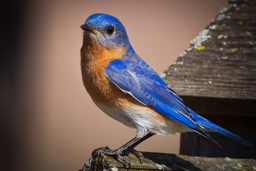

In [4]:
im = Image.open(dest)
im.to_thumb(256,256)

In [5]:
!pwd

/notebooks/FastAICourse


In [6]:
searches = 'forest','bird'
path = Path('bird_or_not')
if not path.exists():
            path.mkdir(exist_ok=False)
            for o in searches:
                dest = (path/o)
                dest.mkdir(exist_ok=True)
                results = search_images_ddg(f'{o} photo')
                download_images(dest,urls=results[:200])
                resize_images(dest,max_size=400,dest=dest)

In [7]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#0) []

In [8]:
def get_img_label(x): return x.parent.name

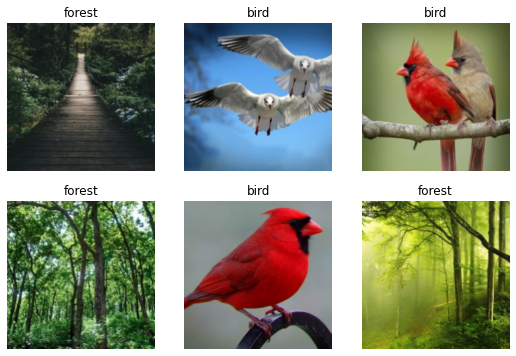

In [10]:
dls = ImageDataLoaders.from_path_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=get_img_label, item_tfms=Resize(224))
dls.show_batch(max_n=6)

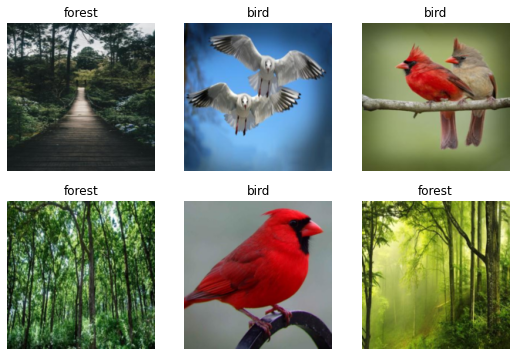

In [9]:
#Note - Used a different way to create ImageDataLoader using the Path as above, it works the same

#dls = DataBlock(
#    blocks=(ImageBlock, CategoryBlock),
#    get_items=get_image_files,
#    splitter=RandomSplitter(valid_pct=0.2,seed=42),
#    get_y=parent_label,
#    item_tfms=[Resize(192,method='squish')]
#).dataloaders(path)
#dls.show_batch(max_n=6)

In [11]:
learn = vision_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.065470,0.232460,0.082192,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.042647,0.036649,0.013699,00:03
1,0.023317,0.001098,0.000000,00:03
2,0.015215,0.000141,0.000000,00:03


In [12]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a:{is_bird}.")
print(f"Probability its a bird : {probs[0]:.4f}")

This is a:bird.
Probability its a bird : 1.0000
